# Lab 8: Twitter API with Tweepy

Welcome to lab 8! In this session, you will set up your own Twitter API credentials so you can access the Twitter API from Python using `tweepy`.

If you have launched this notebook in `binder` the `tweepy` library should already have been installed on the underlying virtual machine that the copy of Jupyter Notebook is running in. If you have downloaded this notebook to use on your own computer (or in the CTR), you might need to install `tweepy` first before running this notebook. To install `tweepy`, open up the command-line (`Command prompt` on Windows, or `Git Bash` in the CTR) and type:

```
conda install tweepy
```

and press Enter. Some text should whiz by indicating that it's installing various things. Once that is done, please restart Jupyter Notebook.

For full documentation about how to use `tweepy` you can reference here: http://www.tweepy.org

<img src="images/twitter-python-json.png/">

Essentially what we are going to do is to use Python to query Twitter's Web-based API, which will return us some JSON data. We can transform this JSON into something that we can play with - a `DataFrame`.

### Import our libraries

In [1]:
import tweepy
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

Before we can do anything, you need to sign up to Twitter (if you haven't already got an account) so that Twitter can grant you programmatic access credentials. Access is free, but there are limitations for non-commercial access.

To get your consumer and access credentials set up, please follow the instructions found here: https://www.gabfirethemes.com/create-twitter-api-key/

In [2]:
# Enter your Twitter API key and access tokens here
api_key = ''
api_secret = ''
access_token = ''
access_token_secret = ''

In [3]:
# Set up the Auth Tweepy object. This takes your credentials from above
# and does some authentication with Twitter
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit_notify=True, wait_on_rate_limit=True)

Now let's extract some tweets for a particular user. For example, we could use `realDonaldTrump` or another screen name of a Twitter user (you can choose your own if you wish).

In [4]:
# Fill in the blanks below. screen_name should be a string of the user 
# we wish to gather tweets from. count is the number of tweets.
tweets = api.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

We do have a Trade Deficit with Canada, as we do with almost all countries (some of them massive). P.M. Justin Trud… https://t.co/xSKFD5YNYm

Larry Kudlow will be my Chief Economic Advisor as Director of the National Economic Council. Our Country will have… https://t.co/uBMM8fsmL8

Please join me with your thoughts and prayers for both aviators, their families and our incredible @USNavy. https://t.co/60bHhrp8Y1

It was wonderful to be back in Missouri where our push for historic TAX CUTS all began. Six months ago I promised t… https://t.co/33TxKS2pTe

Together, we are MAKING AMERICA GREAT AGAIN! https://t.co/CUutL5SZxQ



### Creating a DataFrame

Next, create a `DataFrame` from the tweets gathered in the previous step. Essentially we have a series of tweets, so this should be straightforward.

In [5]:
# Each tweet from above is an object that holds many properties about
# each tweet. Here, we use a Python structure called a list comprehension
# to only extract the tweet text, given by tweet.text on each tweet 
# found in the tweets collection returned above.
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data.head(10)

,Tweets
0,"We do have a Trade Deficit with Canada, as we ..."
1,Larry Kudlow will be my Chief Economic Advisor...
2,Please join me with your thoughts and prayers ...
3,It was wonderful to be back in Missouri where ...
4,"Together, we are MAKING AMERICA GREAT AGAIN! h..."
5,Today the House took major steps toward securi...
6,Thank you for hosting! #MAGA https://t.co/9pHH...
7,We cannot keep a blind eye to the rampant unfa...
8,Five of our incredible @Cabinet Secretaries ar...
9,Perhaps at no time in history have the busines...


Now we have a simple table based on the text of tweets. Let's take a look at what other things we might be able to extract from a `tweet` object. 

In [6]:
# dir gives us a directory of attributes that we can access using the 
# dot method on an object. Ignore everything enclosed with underscores, 
# as these are for internal Python use only.
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


We can see here, there are other intersting attributes such as:

In [7]:
# Print some info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)

974276383051583488
2018-03-15 13:29:25


In [8]:
# Add a print statment to print out the following 
first_tweet = tweets[0]
print( first_tweet.source )  # tweet source
print( first_tweet.favorite_count )  # number of favourites
print( first_tweet.retweet_count )  # number of retweets
print( first_tweet.geo )  # geographical information
print( first_tweet.coordinates )  # coordinates of the tweet
print( first_tweet.entities )  # other entities related to the tweet

Twitter for iPhone
28962
7006
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/xSKFD5YNYm', 'expanded_url': 'https://twitter.com/i/web/status/974276383051583488', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}


Let's add some columns to our `DataFrame`. Use what you have learned about how to add columns to an existing `DataFrame`, and using the list comprehension pattern from above to add some more relevant data that we can then process.

In [9]:
data['Date'] = [x.created_at for x in tweets]
data

,Tweets,Date
0,"We do have a Trade Deficit with Canada, as we ...",2018-03-15 13:29:25
1,Larry Kudlow will be my Chief Economic Advisor...,2018-03-15 11:11:39
2,Please join me with your thoughts and prayers ...,2018-03-15 04:31:47
3,It was wonderful to be back in Missouri where ...,2018-03-14 23:49:09
4,"Together, we are MAKING AMERICA GREAT AGAIN! h...",2018-03-14 22:36:12
5,Today the House took major steps toward securi...,2018-03-14 21:25:58
6,Thank you for hosting! #MAGA https://t.co/9pHH...,2018-03-14 21:20:42
7,We cannot keep a blind eye to the rampant unfa...,2018-03-14 14:37:36
8,Five of our incredible @Cabinet Secretaries ar...,2018-03-14 13:54:50
9,Perhaps at no time in history have the busines...,2018-03-14 13:12:09


In [10]:
# We add relevant data:
data['len']  = [len(x.text) for x in tweets]  # number of characters in a tweet (think length)
data['ID']   = [x.id for x in tweets]
data['Source'] = [x.source for x in tweets]
data['Likes']  = [x.favorite_count for x in tweets] # favorite_count
data['RTs']    =  [x.retweet_count for x in tweets]  # retweet count

In [11]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,Date,len,ID,Source,Likes,RTs
0,"We do have a Trade Deficit with Canada, as we ...",2018-03-15 13:29:25,140,974276383051583488,Twitter for iPhone,28962,7006
1,Larry Kudlow will be my Chief Economic Advisor...,2018-03-15 11:11:39,139,974241711315709954,Twitter for iPhone,41102,9746
2,Please join me with your thoughts and prayers ...,2018-03-15 04:31:47,131,974141083054690304,Twitter for iPhone,45304,10905
3,It was wonderful to be back in Missouri where ...,2018-03-14 23:49:09,140,974069957905428481,Twitter for iPhone,50090,11675
4,"Together, we are MAKING AMERICA GREAT AGAIN! h...",2018-03-14 22:36:12,68,974051595834003457,Twitter for iPhone,51403,10924
5,Today the House took major steps toward securi...,2018-03-14 21:25:58,140,974033924493111296,Twitter for iPhone,74009,16847
6,Thank you for hosting! #MAGA https://t.co/9pHH...,2018-03-14 21:20:42,52,974032596563832832,Twitter for iPhone,29503,6052
7,We cannot keep a blind eye to the rampant unfa...,2018-03-14 14:37:36,85,973931154796457984,Twitter for iPhone,73212,14706
8,Five of our incredible @Cabinet Secretaries ar...,2018-03-14 13:54:50,140,973920392543793154,Twitter for iPhone,47949,11334
9,Perhaps at no time in history have the busines...,2018-03-14 13:12:09,111,973909651065528320,Twitter for iPhone,64429,12638


**What is the average length of tweet?**

In [12]:
mean = data['len'].mean()
print("The average length of the tweets: {}".format(mean))

The average length of the tweets: 125.865


**Which tweet had the most likes?**

In [13]:
fav_max = data['Likes'].max()
fav_tweet = data[data['Likes'] == fav_max]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(np.array(fav_tweet['Tweets'])[0]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(np.array(fav_tweet['len'])[0]))

The tweet with more likes is: 
Lowest rated Oscars in HISTORY. Problem is, we don’t have Stars anymore - except your President (just kidding, of course)!
Number of likes: 213335
122 characters.



**Which tweet had the most retweets (RTs)?**

In [14]:
rt_max = data['RTs'].max()
rt_tweet = data[data['RTs'] == rt_max]
# Max RTs:
print("The tweet with more retweets is: \n{}".format(np.array(rt_tweet['Tweets'])[0]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(np.array(rt_tweet['len'])[0]))

The tweet with more retweets is: 
Lowest rated Oscars in HISTORY. Problem is, we don’t have Stars anymore - except your President (just kidding, of course)!
Number of retweets: 59723
122 characters.



## Time series

Note that earlier, we added a `Date` column to our `DataFrame` containing tweet data. This means we can plot or analyze time series data directly from Pandas `Series` objects. For example:

In [15]:
# We can create a time series of tweet length like this
tlen = pd.Series(data=data['len'].values, index=data['Date'])

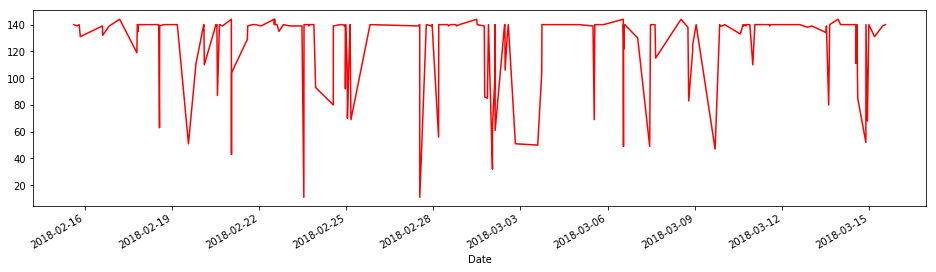

In [16]:
# ...and plot it against time
tlen.plot(figsize=(16,4), color='r')

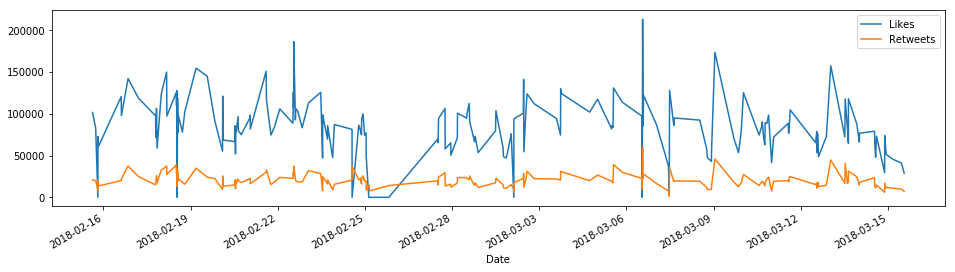

In [17]:
# Plot a likes vs retweets visualization, by getting the time series 
# for favourites and of retweets
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True)

When you're finished with lab 8 (or had completed what you can), choose **Save and Checkpoint** from the **File** menu, then choose **Download as Notebook** and save it to your computer or USB stick. You can then send a copy to the lecturer via Slack or email to check over.